In [1]:
%matplotlib notebook
import cv2
from openpiv import pyprocess, piv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


In [2]:
# WARNING: CUSTOM CROPPING USED AT IMAGE1 AND IMAGE2 DEFINITIONS IN THE PIV PROCESS
# IF ANOTHER VIDEO IS USED, PLEASE CHANGE THIS


spatial_subsample = 1

vidcap = cv2.VideoCapture("C:/Users/laure/Documents/ARA/laurd_ara/video_processing/fxd_low_1.mp4")
success, image1 = vidcap.read()
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
count = 0
U = []
V = []

final_u = []
final_v = []

fin_time = 320
avg_leng = 80

while success and count < fin_time:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
    # print('Read a new frame: ', success)
    if success:
        
        u,v,s2n = pyprocess.extended_search_area_piv(image1, image2,window_size=64,overlap=32);
        x,y = pyprocess.get_coordinates(image1.shape[:2],search_area_size=64,overlap=32)
        image1 = image2.copy()
            
        U.append(u)
        V.append(v)

        if len(U)==avg_leng:
            final_u.append(np.mean(np.stack(U), axis=0))
            final_v.append(np.mean(np.stack(V), axis=0))

            U = U[1:]
            V = V[1:]
        count += 1

In [3]:
# Umean = np.mean(np.stack(U), axis=0)
# Vmean = np.mean(np.stack(V),axis=0)
# plt.ion()

<IPython.core.display.Javascript object>


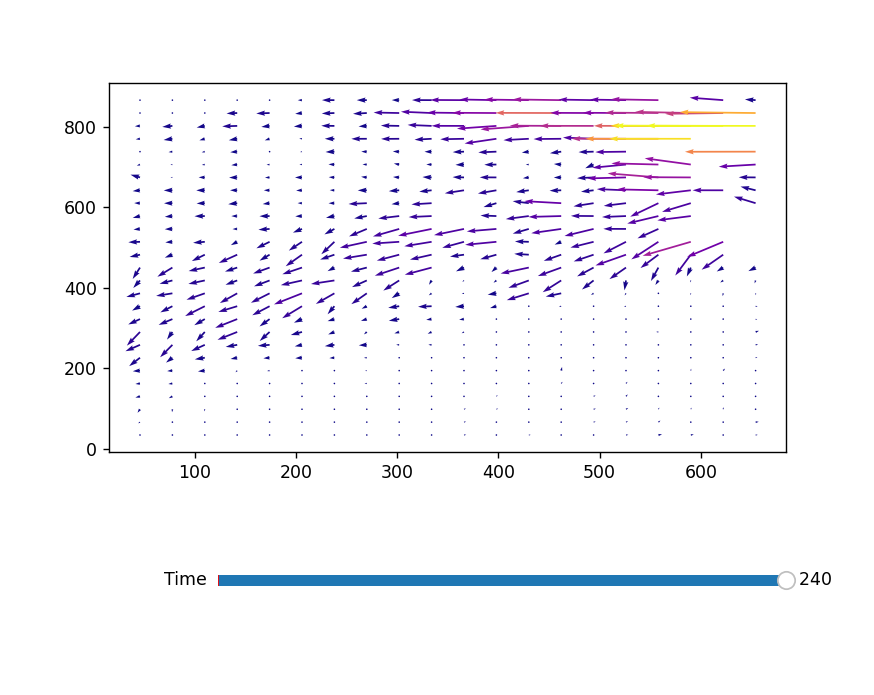

In [4]:
time_ind = 0
fig, ax = plt.subplots(figsize=(8,10))
plt.subplots_adjust(bottom=0.35)
 
# Create and plot sine wave
# ax.imshow(image1,alpha=0.7,cmap="gray")
Q= ax.quiver(x,y,final_u[time_ind],final_v[time_ind],final_u[time_ind]**2+final_v[time_ind]**2, cmap="plasma")#,scale=50, width=.007)
# plt.show()

axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Time', 0, fin_time-avg_leng, valinit=0,valstep=1,dragging=True)
# plt.plot(np.mean(Umean,axis=1)*30,y[:,0],color='r',lw=3)


def update_quiver(val):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    int_val = int(val)
    Q.set_UVC(final_u[int_val],final_v[int_val],final_u[int_val]**2+final_v[int_val]**2)



freq.on_changed(update_quiver)

# plt.colorbar(Q, orientation='horizontal',label="Speed (px)")#,pad=0.05)
plt.show()